In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.color import label2rgb
from utilities import *


# settings for LBP
radius = 3
n_points = 8 * radius



In [9]:
#pre-processing for lbp
# Get borders of the text area and apply it to the gray level
def pre_lbp(image):
    img = threshold_image(image)

    Ymin, Ymax, Xmin, Xmax = extract_textarea_borders(img)

    text = image[Ymin : Ymax, Xmin : Xmax]

    print(text.shape)
    plt.imshow(text)
    plt.show()
    return text

In [10]:
# Apply lbp on the image (provide the image as BGR which is the output of cv.imread)
def extract_lbp(image):

    text = pre_lbp(image)
    gray_text = cv2.cvtColor(text, cv2.COLOR_BGR2GRAY)

    # lbp = local_binary_pattern(image, n_points, radius, METHOD)
    lbp = local_binary_pattern(gray_text, n_points, radius, 'uniform')


    print(lbp.shape)
    plt.imshow(lbp, cmap='gray')
    plt.show()
    return text, lbp

In [11]:
female = cv2.imread("data/Females/F12.jpg")
male = cv2.imread("data/Males/M45.jpg")

(1213, 2273, 3)


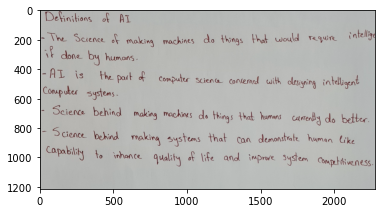

(1213, 2273)


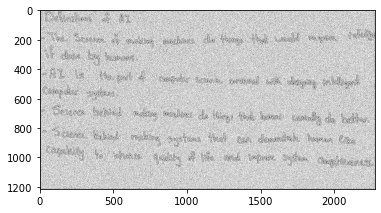

(1999, 1621, 3)


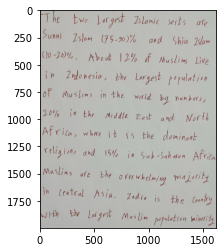

(1999, 1621)


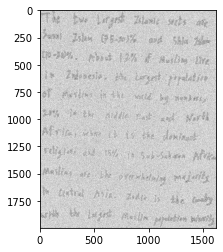

In [12]:
text_female, lbp_female = extract_lbp(female)
text_male, lbp_male = extract_lbp(male)


In [13]:

#Four functions used to plot histogram of the lbp compared to the image

def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')

def plot_lbp_hist(image, lbp_image):
    # plot histograms of LBP of textures
    fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
    plt.gray()

    titles = ('edge', 'flat', 'corner')
    w = width = radius - 1
    edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
    flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
    i_14 = n_points // 4            # 1/4th of the histogram
    i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
    corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                    list(range(i_34 - w, i_34 + w + 1)))

    label_sets = (edge_labels, flat_labels, corner_labels)

    for ax, labels in zip(ax_img, label_sets):
        ax.imshow(overlay_labels(image, lbp_image, labels))

    for ax, labels, name in zip(ax_hist, label_sets, titles):
        counts, _, bars = hist(ax, lbp_image)
        highlight_bars(bars, labels)
        ax.set_ylim(top=np.max(counts[:-1]))
        ax.set_xlim(right=n_points + 2)
        ax.set_title(name)

    ax_hist[0].set_ylabel('Percentage')
    for ax in ax_img:
        ax.axis('off')

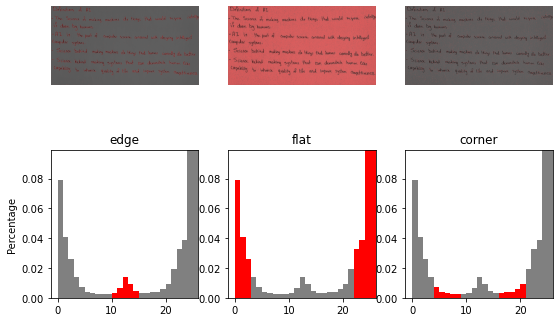

In [14]:
plot_lbp_hist(text_female, lbp_female)

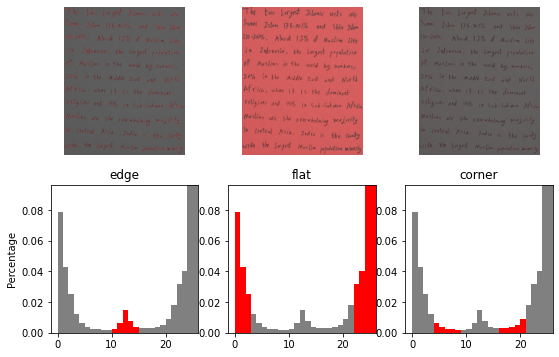

In [15]:
plot_lbp_hist(text_male, lbp_male)